In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.precision', 4)
%matplotlib inline

#### Promedios mensuales de Cerros Noroccidentales - Ibagué

In [2]:
df_cerros = pd.read_csv('data/DS-Tolima-2012-2017-radiacion.csv', sep=';')
df_pr_horario = df_cerros.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (30765, 5)
Registros con registros de 2012-2014:  (19239, 5)
Registros con RadSolar <= 0:  (10833, 5)
(31, 2)


,mes,RadSolar
0,1,4.1899
1,2,3.9212
2,3,4.1072
3,4,3.8257
4,5,4.4071
5,6,4.2364
6,7,3.9320
7,8,3.7561
8,9,4.3552
9,10,3.9189


#### Promedios mensuales de Florencia

In [3]:
df_florencia = pd.read_csv('data/DS-Florencia-2012-2017-radiacion.csv', sep=';')
df_pr_horario = df_florencia.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (15534, 5)
Registros con registros de 2012-2014:  (8306, 5)
Registros con RadSolar <= 0:  (4274, 5)
(31, 2)


,mes,RadSolar
0,1,3.9482
1,2,3.8494
2,3,3.6620
3,4,3.5747
4,5,3.9083
5,6,3.6176
6,7,3.4556
7,8,3.7048
8,9,4.0062
9,10,3.6657


#### Promedios mensuales de Las Flores - Atlántico

In [4]:
df_flores = pd.read_csv('data/DS-Las-Flores-2012-2015-radiacion.csv', sep=';')
df_pr_horario = df_flores.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (23025, 5)
Registros con registros de 2012-2014:  (17753, 5)
Registros con RadSolar <= 0:  (9098, 5)
(31, 2)


,mes,RadSolar
0,1,5.3947
1,2,4.9407
2,3,4.9745
3,4,4.9349
4,5,5.1558
5,6,5.2151
6,7,4.8718
7,8,4.9809
8,9,5.1779
9,10,5.1335


#### Promedios mensuales de Repelon - Atlántico

In [5]:
df_repelon = pd.read_csv('data/DS-Repelon-2012-2017-radiacion.csv', sep=';')
df_pr_horario = df_repelon.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (15723, 5)
Registros con registros de 2012-2014:  (3245, 5)
Registros con RadSolar <= 0:  (3206, 5)
(31, 2)


,mes,RadSolar
0,1,5.0185
1,2,5.5939
2,3,5.1557
3,4,5.5301
4,5,5.6901
5,6,5.4937
6,7,5.7832
7,8,5.3583
8,9,5.5068
9,10,5.3143


#### Promedios mensuales de El Diamante - Casanare

In [6]:
df_diamante = pd.read_csv('data/DS-El-Diamante-2013-2017-radiacion.csv', sep=';')
df_pr_horario = df_diamante.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (19243, 5)
Registros con registros de 2012-2014:  (7784, 5)
Registros con RadSolar <= 0:  (4613, 5)
(31, 2)


,mes,RadSolar
0,1,4.6911
1,2,4.8724
2,3,4.5136
3,4,4.9729
4,5,5.0101
5,6,5.0872
6,7,4.3624
7,8,4.7807
8,9,4.7540
9,10,5.0064


#### Promedios mensuales de Valdivia - Antioquia

In [7]:
df_valdivia = pd.read_csv('data/DS-Valdivia-2012-2018-radiacion.csv', sep=';')
df_pr_horario = df_valdivia.copy()

if 'FechaHora' in df_pr_horario.columns:
  ann = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[0]).str.split('/', n=2, expand=True)[2]
  dia = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[1]
  mes = df_pr_horario['FechaHora'].str.split('/', n=2, expand=True)[0]
  hora = (df_pr_horario['FechaHora'].str.split(' ', n=1, expand=True)[1]).str.split(':', n=1, expand=True)[0]
  if 'mes' not in df_pr_horario.columns and 'hora' not in df_pr_horario.columns:
    df_pr_horario.insert(0, 'ann', ann, True)
    df_pr_horario.insert(1, 'mes', mes, True)
    df_pr_horario.insert(2, 'dia', dia, True)
    df_pr_horario.insert(3, 'hora', hora, True)
    df_pr_horario = df_pr_horario.drop(['FechaHora'], axis=1)

print('Todos los registros: ', df_pr_horario.shape)

# Eliminar registros de los años distintos de 2012, 2013 y 2014
df_pr_horario = df_pr_horario.drop(df_pr_horario[
    (df_pr_horario['ann'] != '2012') &
    (df_pr_horario['ann'] != '2013') &
    (df_pr_horario['ann'] != '2014')].index)

print('Registros con registros de 2012-2014: ', df_pr_horario.shape)

# Eliminar registros con radiacion solar <= 0
df_pr_horario = df_pr_horario.drop(df_pr_horario[df_pr_horario['RadSolar'] <= 0].index)

print('Registros con RadSolar <= 0: ', df_pr_horario.shape)

# Promedio horario de RadSolar
df_pr_horario = df_pr_horario[['mes', 'dia', 'hora', 'RadSolar']]
df_pr_horario = df_pr_horario.groupby(['mes', 'dia', 'hora'], as_index=False).mean()

df_pr_mensual = df_pr_horario.copy()
# df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 0].index)
# print('Registros con RadSolar mensual <= 0: ', df_pr_horario.shape)

# RadSolar diaria en kW/m2
df_pr_mensual = df_pr_mensual[['mes', 'dia', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes', 'dia'], as_index=False).sum()

df_pr_mensual[['mes']] = df_pr_mensual[['mes']].astype(int)
df_pr_mensual[['dia']] = df_pr_mensual[['dia']].astype(int)

# Eliminar registros con dias de menos de 3000 W/m2
df_pr_mensual = df_pr_mensual.drop(df_pr_mensual[df_pr_mensual['RadSolar'] < 3000].index)

df_pr_mensual.sort_values(by=['mes', 'dia'], inplace=True, ignore_index=True)
df_pr_mensual.to_csv('DS-Bosques-de-San-Joaquín-prom_mensuales.csv', sep=';', index=False, encoding='utf-8')

# Promedio mensual de RadSolar
df_pr_mensual = df_pr_mensual[['mes', 'RadSolar']]
df_pr_mensual = df_pr_mensual.groupby(['mes'], as_index=False).mean()

# Convertir RadSolar de w/m2 a kW/m2
df_pr_mensual[['RadSolar']] = df_pr_mensual[['RadSolar']] / 1000

print(df_pr_mensual.shape)
df_pr_mensual.head(12)

Todos los registros:  (43026, 5)
Registros con registros de 2012-2014:  (21829, 5)
Registros con RadSolar <= 0:  (11675, 5)
(31, 2)


,mes,RadSolar
0,1,4.6513
1,2,4.3060
2,3,4.5081
3,4,4.6981
4,5,4.4028
5,6,4.4890
6,7,4.2331
7,8,4.6652
8,9,4.3644
9,10,4.4588


#### Cargar datos para graficar

In [8]:
df = pd.read_csv('data/Tabla-de-radiación-solar-Colombia.csv', sep=';')
print(df.dtypes)
df.head(12)

MES/FUENTE     object
RF            float64
NASA          float64
IDEAM         float64
ALTITUD         int64
RF.1          float64
NASA.1        float64
IDEAM.1       float64
ALTITUD.1       int64
RF.2          float64
NASA.2        float64
IDEAM.2       float64
ALTITUD.2       int64
RF.3          float64
NASA.3        float64
IDEAM.3       float64
ALTITUD.3       int64
RF.4          float64
NASA.4        float64
IDEAM.4       float64
ALTITUD.4       int64
RF.5          float64
NASA.5        float64
IDEAM.5       float64
ALTITUD.5       int64
dtype: object


,MES/FUENTE,RF,NASA,IDEAM,ALTITUD,RF.1,NASA.1,IDEAM.1,ALTITUD.1,RF.2,...,IDEAM.3,ALTITUD.3,RF.4,NASA.4,IDEAM.4,ALTITUD.4,RF.5,NASA.5,IDEAM.5,ALTITUD.5
0,Enero,3.674,4.55,4.190,1946,3.861,4.24,3.948,600,4.046,...,5.019,10,3.817,5.32,4.691,160,3.677,4.21,4.651,1131
1,Febrero,3.800,4.72,3.921,1946,3.794,4.02,3.849,600,4.199,...,5.594,10,3.950,5.22,4.872,160,3.982,4.31,4.306,1131
2,Marzo,3.575,4.77,4.107,1946,3.757,3.78,3.662,600,3.699,...,5.156,10,3.471,4.92,4.514,160,3.764,4.38,4.508,1131
3,Abril,4.020,4.52,3.826,1946,3.760,3.78,3.575,600,3.709,...,5.530,10,3.894,4.35,4.973,160,3.745,4.06,4.698,1131
4,Mayo,3.948,4.52,4.407,1946,3.572,3.79,3.908,600,3.695,...,5.690,10,3.954,4.29,5.010,160,3.965,4.15,4.403,1131
5,Junio,3.967,4.60,4.236,1946,3.436,3.57,3.618,600,3.972,...,5.494,10,3.651,4.09,5.087,160,3.966,4.33,4.489,1131
6,Julio,3.929,4.92,3.932,1946,3.544,3.55,3.456,600,3.952,...,5.783,10,3.760,4.20,4.362,160,4.094,4.69,4.233,1131
7,Agosto,4.057,4.97,3.756,1946,3.878,3.73,3.705,600,3.761,...,5.358,10,3.875,4.46,4.781,160,4.276,4.66,4.665,1131
8,Septiembre,4.249,4.80,4.355,1946,4.143,4.18,4.006,600,3.844,...,5.507,10,4.115,4.79,4.754,160,4.140,4.49,4.364,1131
9,Octubre,4.266,4.56,3.919,1946,4.336,4.30,3.666,600,3.967,...,5.314,10,4.202,4.83,5.006,160,3.870,4.32,4.459,1131


#### Cerros Noroccientales. Ibagué (Tólima - Región Andina)

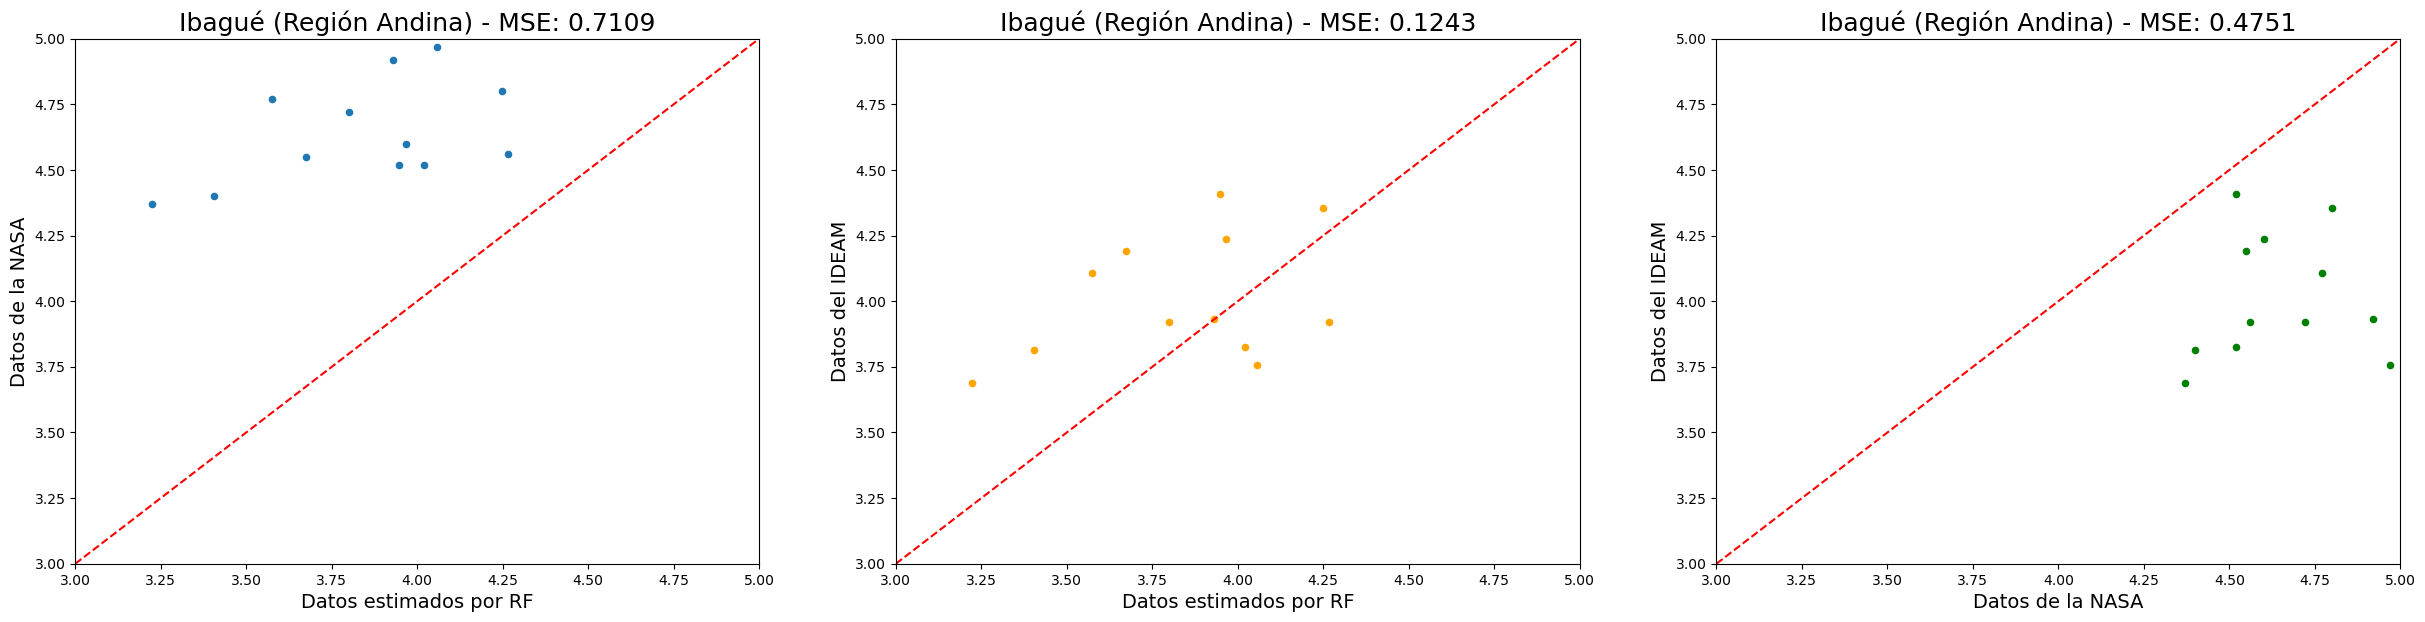

In [9]:
fig = plt.figure(figsize=(30, 15))

ax = fig.add_subplot(2,3,1)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF', y='NASA', kind='scatter', ax=ax)
plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['RF'], df['NASA']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(2,3,2)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF', y='IDEAM', kind='scatter', ax=ax, color='orange')
plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['RF'], df['IDEAM']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(2,3,3)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='NASA', y='IDEAM', kind='scatter', ax=ax, color='green')
plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['NASA'], df['IDEAM']), 4)), fontsize=18)
plt.xlabel("Datos de la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

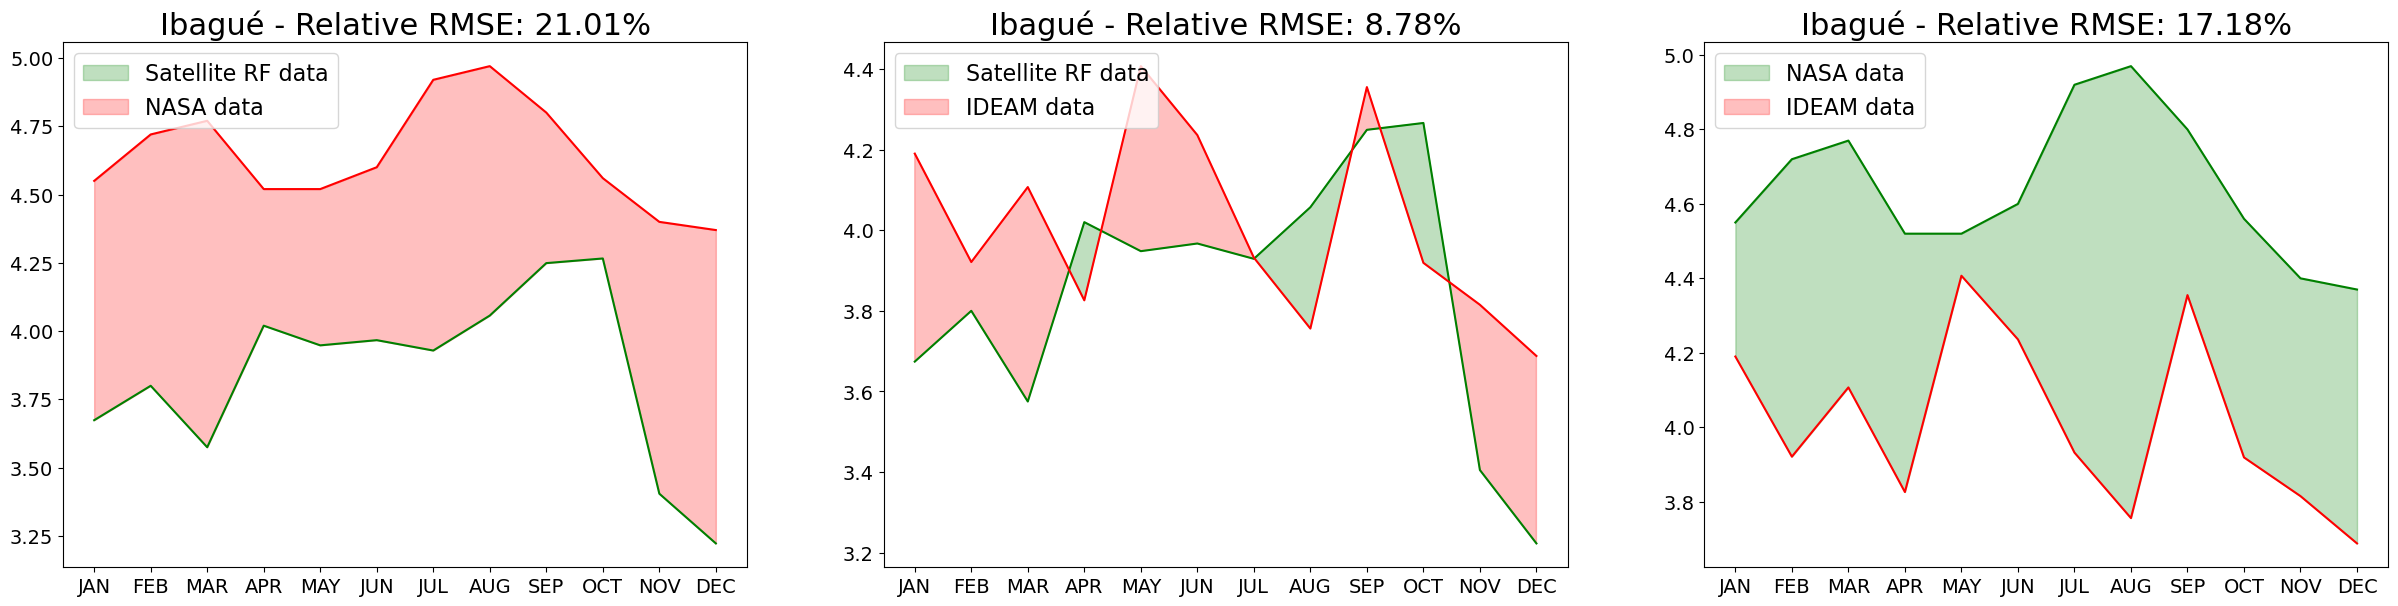

In [23]:
fig = plt.figure(figsize=(30, 15))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(2,3,1)

# Plot lines
ax.plot(mes, df['RF'], color="green")
ax.plot(mes, df['NASA'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF'], df['NASA'], where=(df['RF'] > df['NASA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF'], df['NASA'], where=(df['RF'] <= df['NASA']), 
    interpolate=True, color="red", alpha=0.25,
    label="NASA data"
)
# plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['RF'], df['NASA']), 4)), fontsize=18)
plt.title("Ibagué - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF'], df['NASA'])) / df['IDEAM'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(2,3,2)
ax.plot(mes, df['RF'], color="green")
ax.plot(mes, df['IDEAM'], color="red")

ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] > df['IDEAM']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)
ax.fill_between(
    mes, df['RF'], df['IDEAM'], where=(df['RF'] <= df['IDEAM']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['RF'], df['IDEAM']), 4)), fontsize=18)
plt.title("Ibagué - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF'], df['IDEAM'])) / df['IDEAM'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(2,3,3)
ax.plot(mes, df['NASA'], color="green")
ax.plot(mes, df['IDEAM'], color="red")

ax.fill_between(
    mes, df['NASA'], df['IDEAM'], where=(df['NASA'] > df['IDEAM']), 
    interpolate=True, color="green", alpha=0.25, 
    label="NASA data"
)
ax.fill_between(
    mes, df['NASA'], df['IDEAM'], where=(df['NASA'] <= df['IDEAM']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Ibagué (Región Andina) - MSE: "+str(round(mean_squared_error(df['NASA'], df['IDEAM']), 4)), fontsize=18)
plt.title("Ibagué - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['NASA'], df['IDEAM'])) / df['IDEAM'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

plt.savefig('Ibagué.png', dpi=300, bbox_inches='tight')
plt.show()

#### Florencia (Caqueta - Región Amazónica)

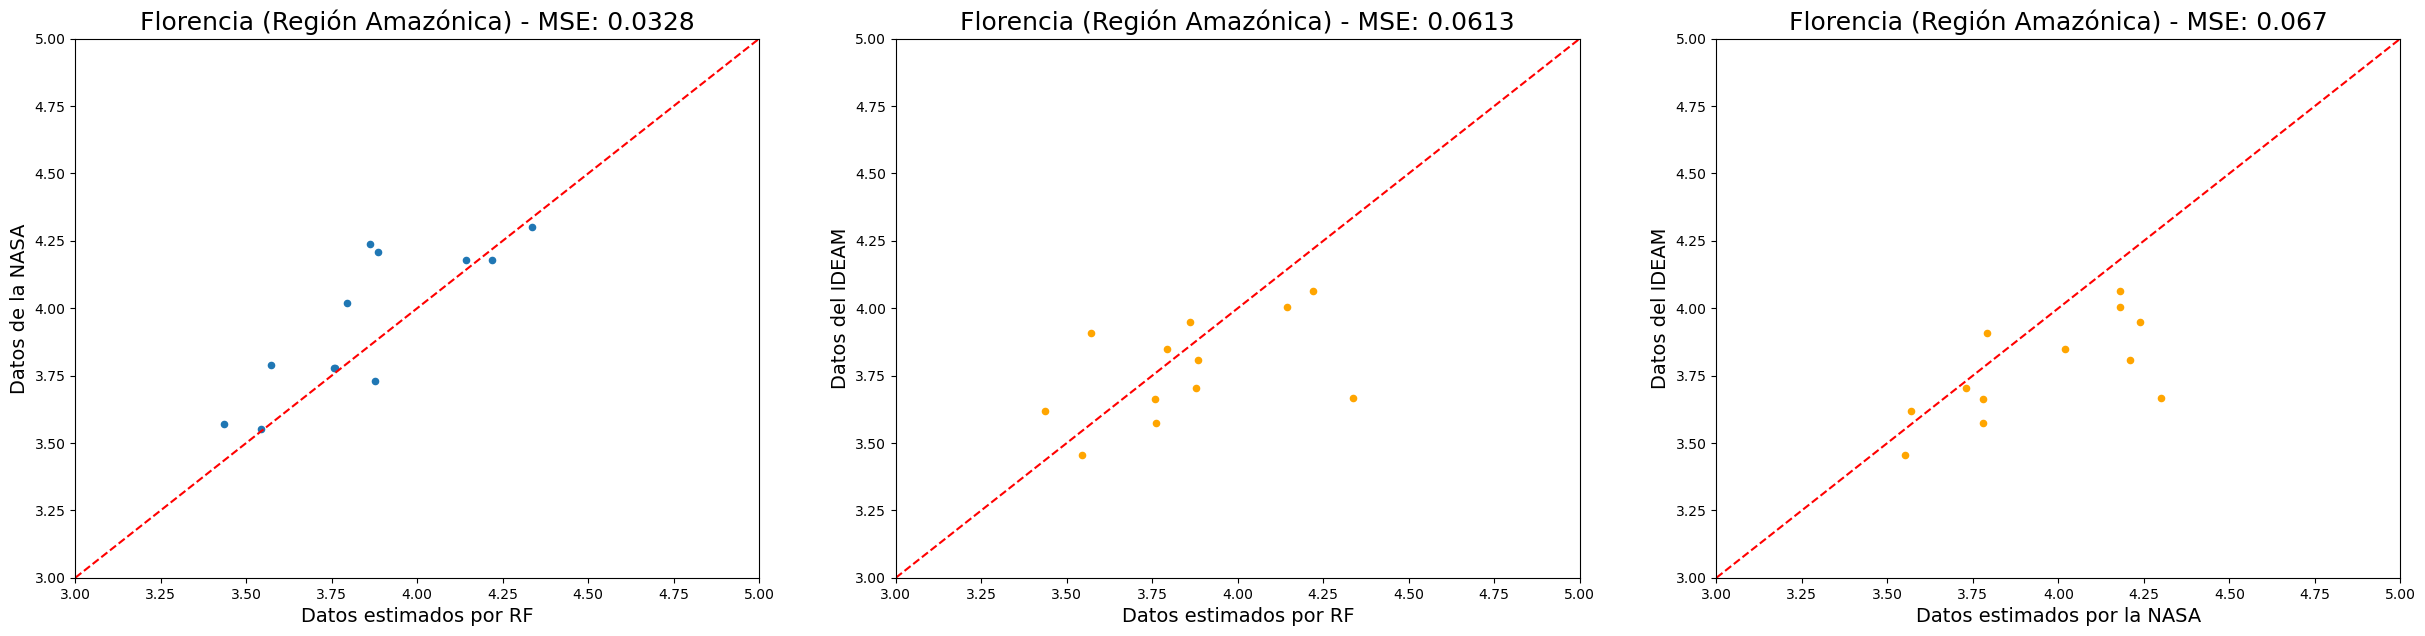

In [11]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.1', y='NASA.1', kind='scatter', ax=ax)
plt.title("Florencia (Región Amazónica) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['NASA.1']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.1', y='IDEAM.1', kind='scatter', ax=ax, color='orange')
plt.title("Florencia (Región Amazónica) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='NASA.1', y='IDEAM.1', kind='scatter', ax=ax, color='orange')
plt.title("Florencia (Región Amazónica) - MSE: "+str(round(mean_squared_error(df['NASA.1'], df['IDEAM.1']), 4)), fontsize=18)
plt.xlabel("Datos estimados por la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

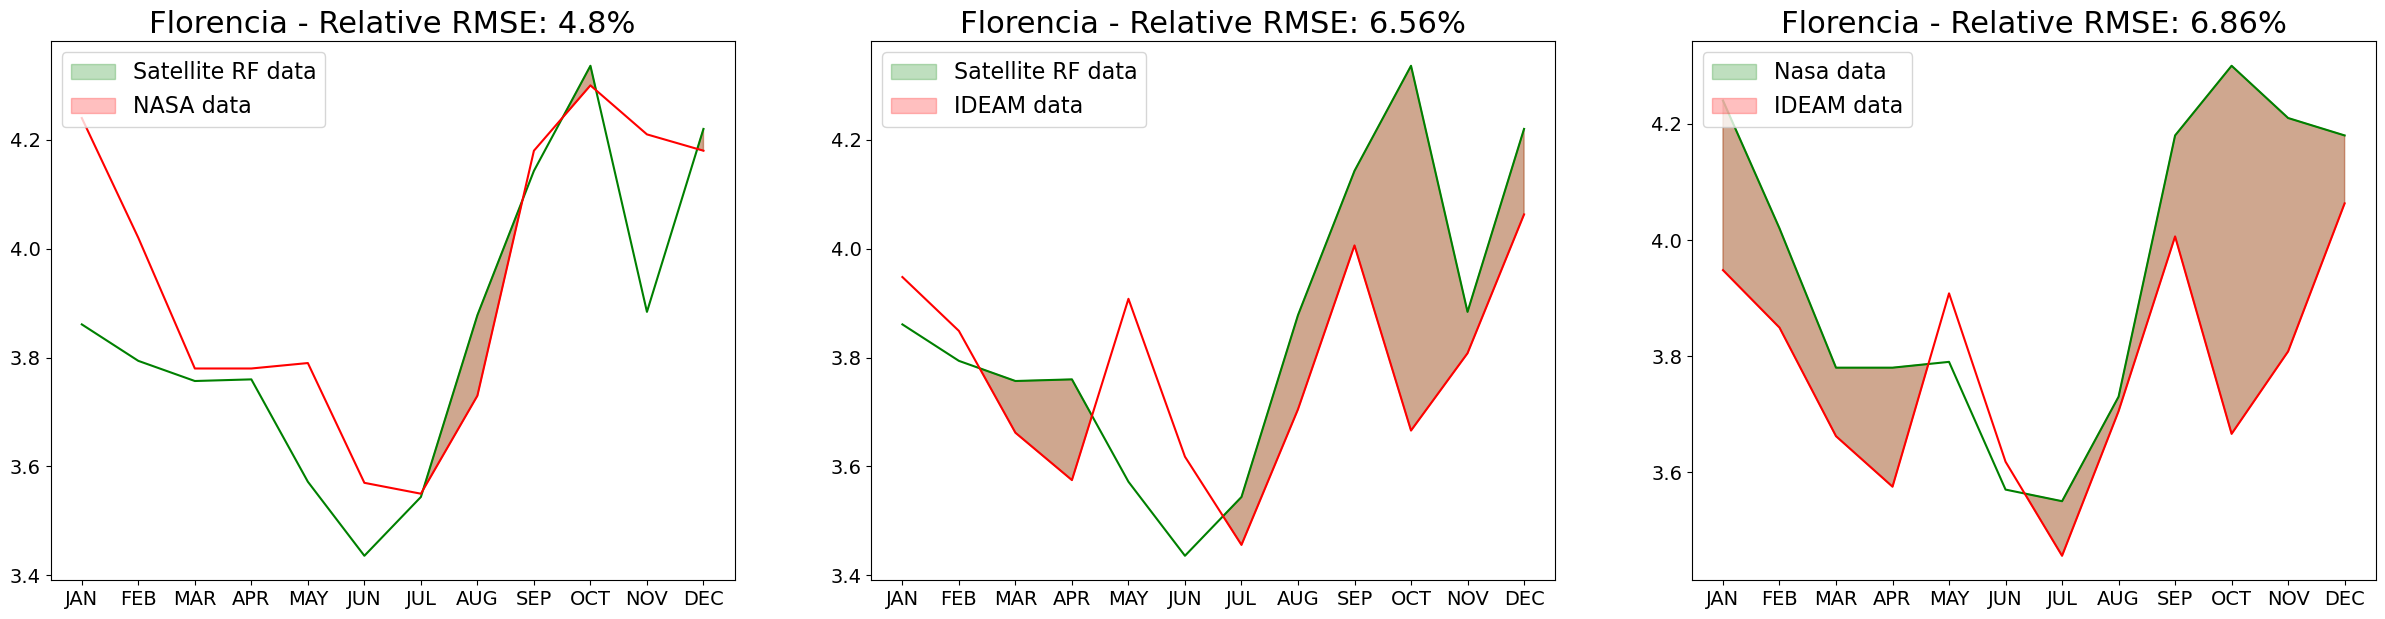

In [30]:
fig = plt.figure(figsize=(30, 7))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.1'], color="green")
ax.plot(mes, df['NASA.1'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.1'], df['NASA.1'], where=(df['RF.1'] > df['NASA.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.1'], df['NASA.1'], where=(df['RF.1'] > df['NASA.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="NASA data"
)
# plt.title("Florencia (Amazon region) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['NASA.1']), 4)), fontsize=22)
plt.title("Florencia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.1'], df['NASA.1'])) / df['IDEAM.1'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.1'], color="green")
ax.plot(mes, df['IDEAM.1'], color="red")

ax.fill_between(
    mes, df['RF.1'], df['IDEAM.1'], where=(df['RF.1'] > df['IDEAM.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)
ax.fill_between(
    mes, df['RF.1'], df['IDEAM.1'], where=(df['RF.1'] > df['IDEAM.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Florencia (Amazon region) - MSE: "+str(round(mean_squared_error(df['RF.1'], df['IDEAM.1']), 4)), fontsize=22)
plt.title("Florencia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.1'], df['IDEAM.1'])) / df['IDEAM.1'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['NASA.1'], color="green")
ax.plot(mes, df['IDEAM.1'], color="red")

ax.fill_between(
    mes, df['NASA.1'], df['IDEAM.1'], where=(df['NASA.1'] > df['IDEAM.1']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Nasa data"
)
ax.fill_between(
    mes, df['NASA.1'], df['IDEAM.1'], where=(df['NASA.1'] > df['IDEAM.1']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Florencia (Amazon region) - MSE: "+str(round(np.sqrt(mean_squared_error(df['NASA.1'], df['IDEAM.1'])), 4)), fontsize=22)
plt.title("Florencia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['NASA.1'], df['IDEAM.1'])) / df['IDEAM.1'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

plt.savefig('Florencia.png', dpi=300, bbox_inches='tight')
plt.show()

#### Las Flores. Barranquilla (Atlántico - Región Caribe)

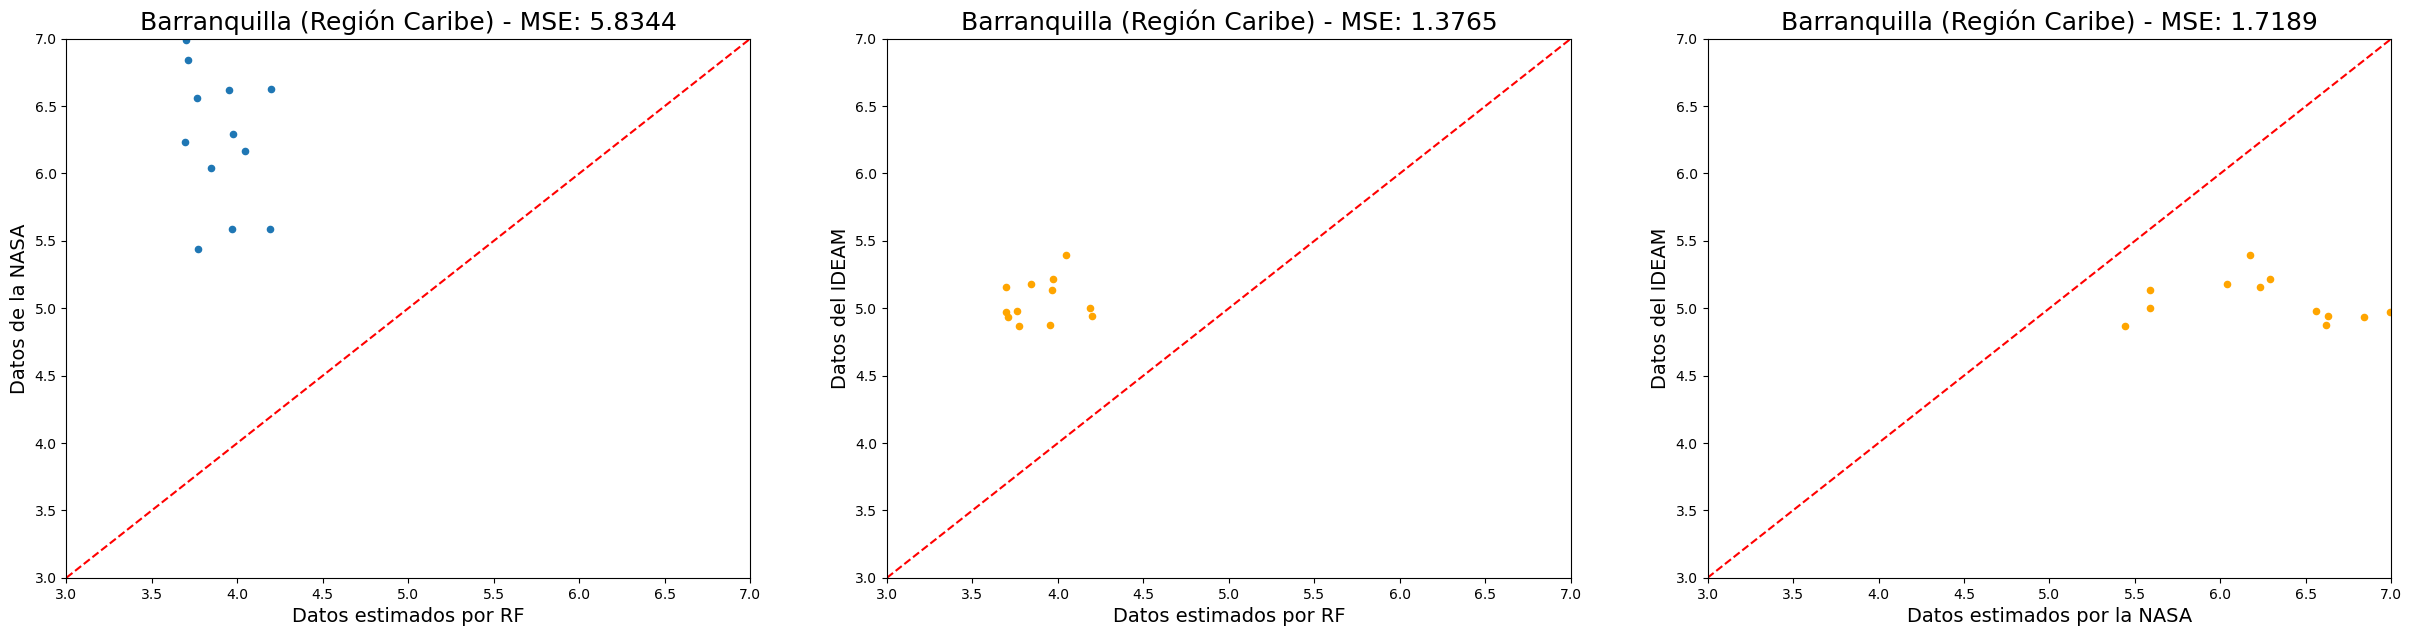

In [13]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='RF.2', y='NASA.2', kind='scatter', ax=ax)
plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['NASA.2']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='RF.2', y='IDEAM.2', kind='scatter', ax=ax, color='orange')
plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['IDEAM.2']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='NASA.2', y='IDEAM.2', kind='scatter', ax=ax, color='orange')
plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['NASA.2'], df['IDEAM.2']), 4)), fontsize=18)
plt.xlabel("Datos estimados por la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

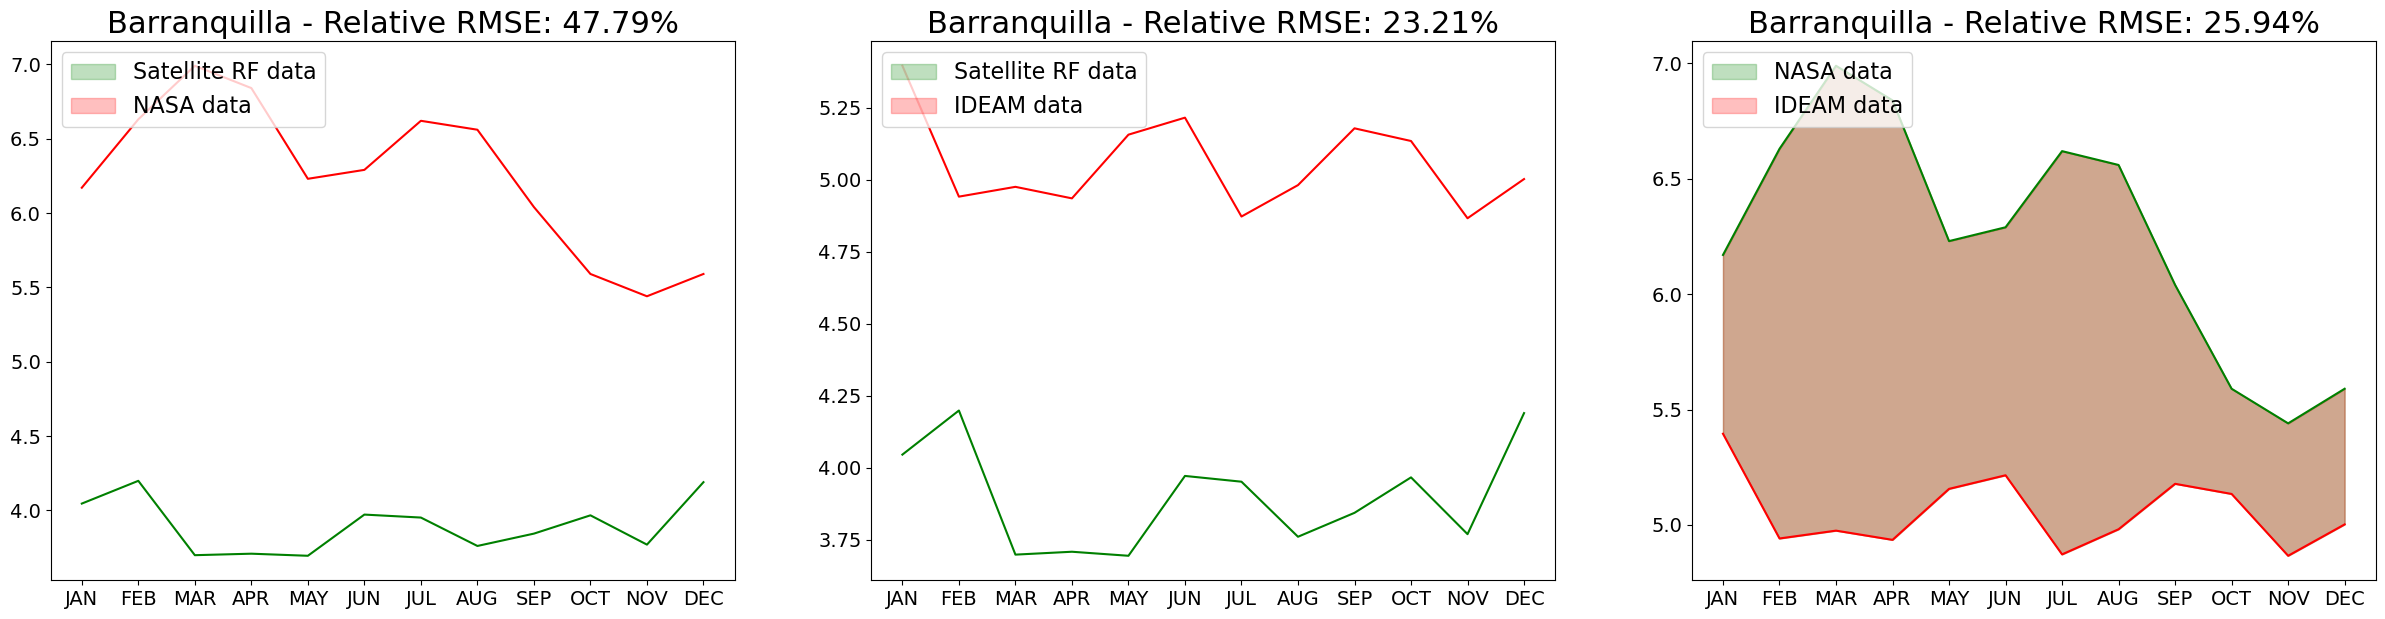

In [27]:
fig = plt.figure(figsize=(30, 7))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.2'], color="green")
ax.plot(mes, df['NASA.2'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.2'], df['NASA.2'], where=(df['RF.2'] > df['NASA.2']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.2'], df['NASA.2'], where=(df['RF.2'] > df['NASA.2']), 
    interpolate=True, color="red", alpha=0.25,
    label="NASA data"
)
# plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['NASA.2']), 4)), fontsize=22)
plt.title("Barranquilla - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.2'], df['NASA.2'])) / df['IDEAM.2'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.2'], color="green")
ax.plot(mes, df['IDEAM.2'], color="red")

ax.fill_between(
    mes, df['RF.2'], df['IDEAM.2'], where=(df['RF.2'] > df['IDEAM.2']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)
ax.fill_between(
    mes, df['RF.2'], df['IDEAM.2'], where=(df['RF.2'] > df['IDEAM.2']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.2'], df['IDEAM.2']), 4)), fontsize=22)
plt.title("Barranquilla - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.2'], df['IDEAM.2'])) / df['IDEAM.2'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['NASA.2'], color="green")
ax.plot(mes, df['IDEAM.2'], color="red")

ax.fill_between(
    mes, df['NASA.2'], df['IDEAM.2'], where=(df['NASA.2'] > df['IDEAM.2']), 
    interpolate=True, color="green", alpha=0.25, 
    label="NASA data"
)
ax.fill_between(
    mes, df['NASA.2'], df['IDEAM.2'], where=(df['NASA.2'] > df['IDEAM.2']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Barranquilla (Región Caribe) - MSE: "+str(round(mean_squared_error(df['NASA.2'], df['IDEAM.2']), 4)), fontsize=22)
plt.title("Barranquilla - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['NASA.2'], df['IDEAM.2'])) / df['IDEAM.2'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

plt.savefig('Barranquilla.png', dpi=300, bbox_inches='tight')
plt.show()

#### Repelón (Atlántico - Región Caribe)

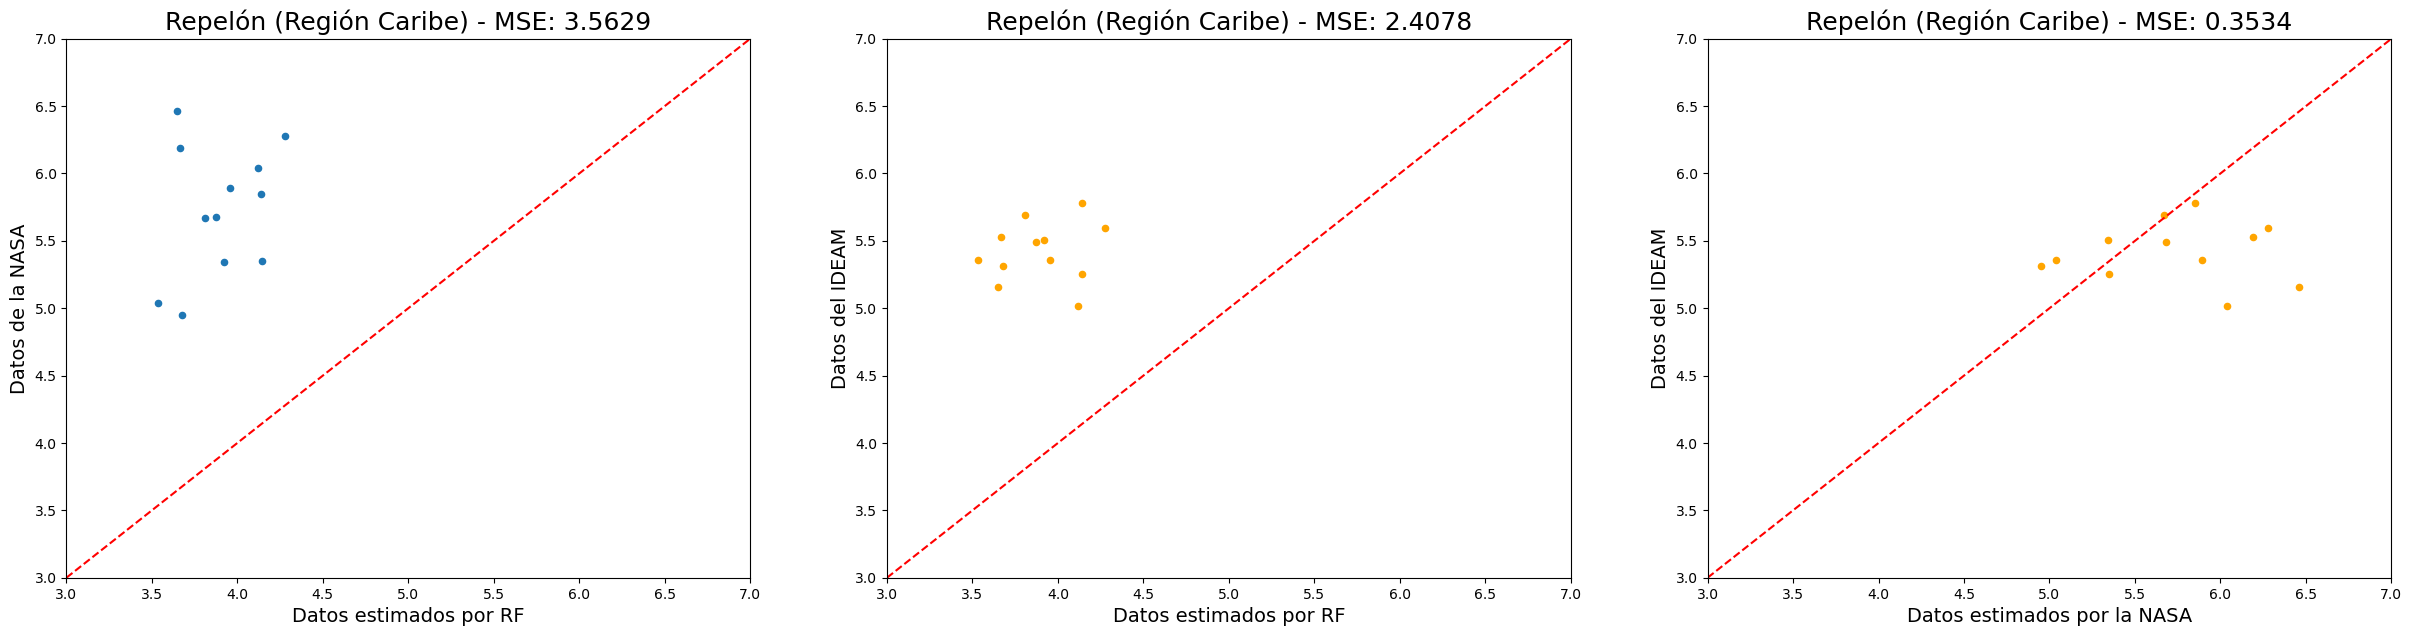

In [15]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='RF.3', y='NASA.3', kind='scatter', ax=ax)
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['NASA.3']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='RF.3', y='IDEAM.3', kind='scatter', ax=ax, color='orange')
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['IDEAM.3']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 7, 3, 7])
plt.plot([3, 7], [3, 7], "r--")
df.plot(x='NASA.3', y='IDEAM.3', kind='scatter', ax=ax, color='orange')
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['NASA.3'], df['IDEAM.3']), 4)), fontsize=18)
plt.xlabel("Datos estimados por la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

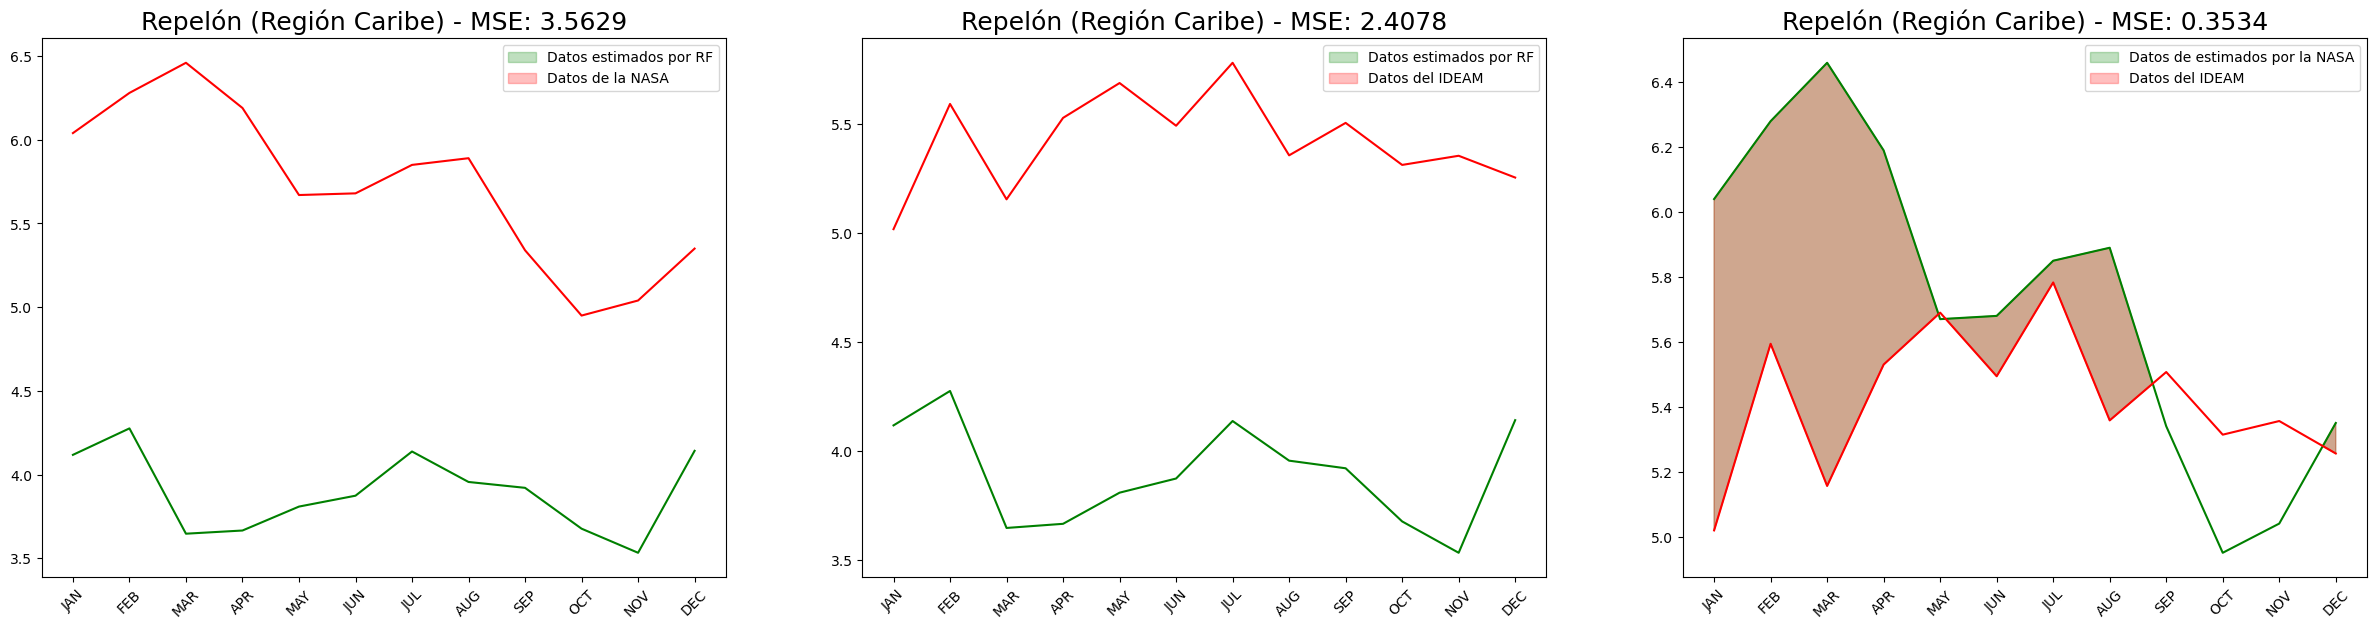

In [16]:
fig = plt.figure(figsize=(30, 7))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.3'], color="green")
ax.plot(mes, df['NASA.3'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.3'], df['NASA.3'], where=(df['RF.3'] > df['NASA.3']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.3'], df['NASA.3'], where=(df['RF.3'] > df['NASA.3']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos de la NASA"
)
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['NASA.3']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.3'], color="green")
ax.plot(mes, df['IDEAM.3'], color="red")

ax.fill_between(
    mes, df['RF.3'], df['IDEAM.3'], where=(df['RF.3'] > df['IDEAM.3']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos estimados por RF"
)
ax.fill_between(
    mes, df['RF.3'], df['IDEAM.3'], where=(df['RF.3'] > df['IDEAM.3']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos del IDEAM"
)
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['RF.3'], df['IDEAM.3']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['NASA.3'], color="green")
ax.plot(mes, df['IDEAM.3'], color="red")

ax.fill_between(
    mes, df['NASA.3'], df['IDEAM.3'], where=(df['NASA.3'] > df['IDEAM.3']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Datos de estimados por la NASA"
)
ax.fill_between(
    mes, df['NASA.3'], df['IDEAM.3'], where=(df['NASA.3'] > df['IDEAM.3']), 
    interpolate=True, color="red", alpha=0.25,
    label="Datos del IDEAM"
)
plt.title("Repelón (Región Caribe) - MSE: "+str(round(mean_squared_error(df['NASA.3'], df['IDEAM.3']), 4)), fontsize=18)
plt.xticks(rotation=45)
ax.legend();

plt.show()

#### El Diamante. Paz de Ariporo (Casanare - Región Orinoquía)

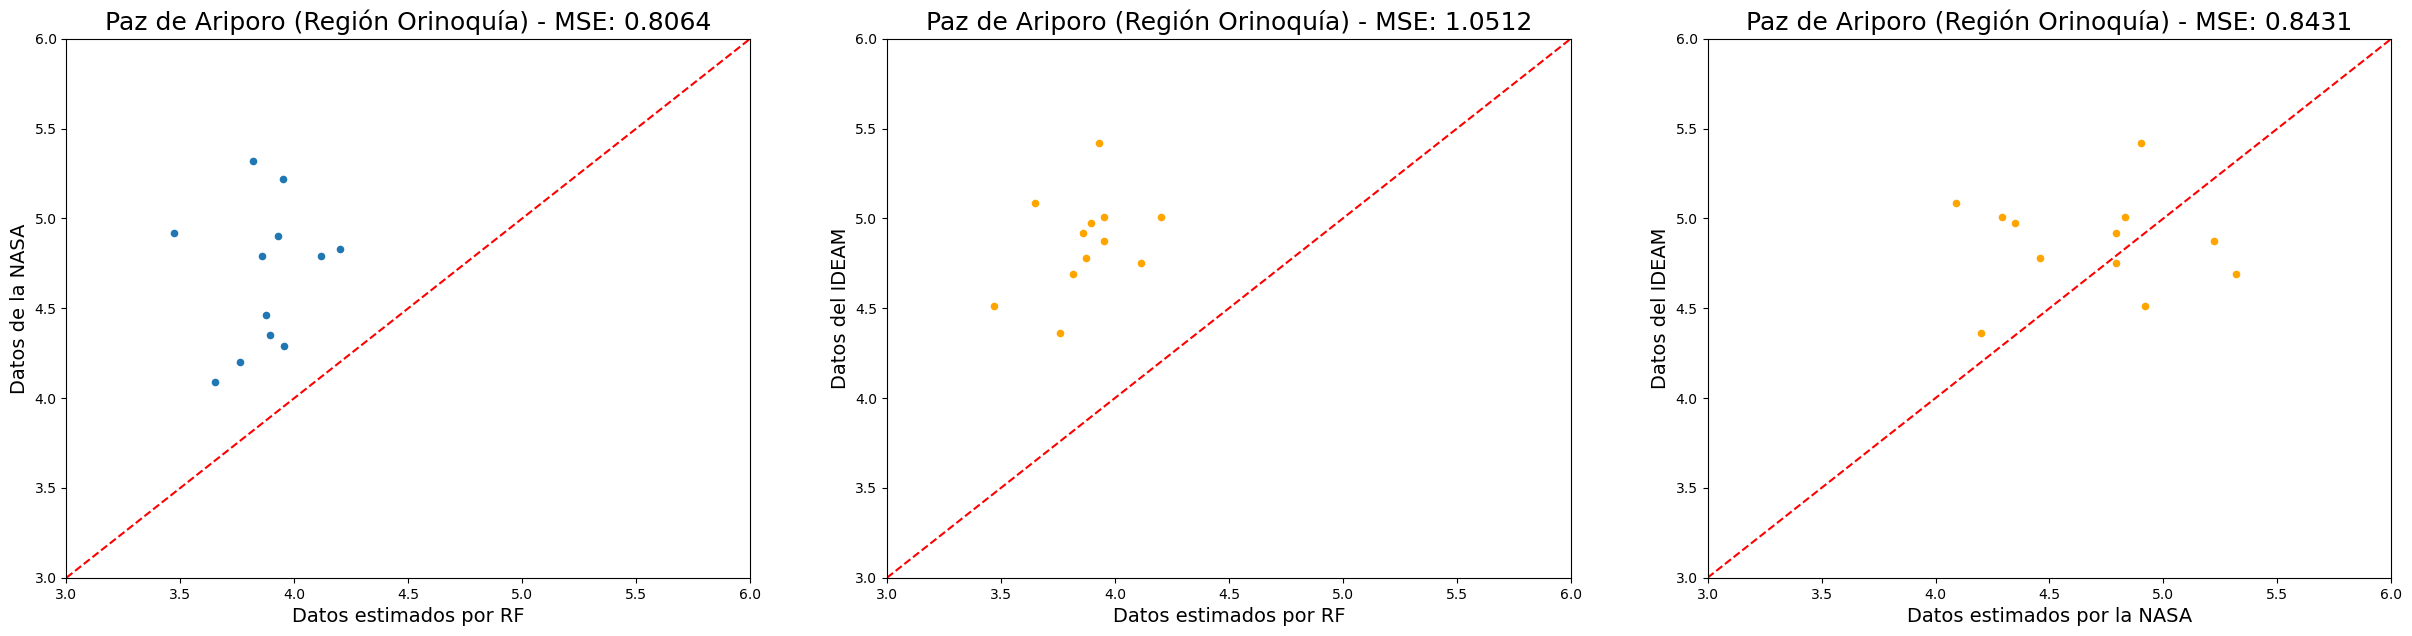

In [17]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 6, 3, 6])
plt.plot([3, 6], [3, 6], "r--")
df.plot(x='RF.4', y='NASA.4', kind='scatter', ax=ax)
plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['NASA.4']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 6, 3, 6])
plt.plot([3, 6], [3, 6], "r--")
df.plot(x='RF.4', y='IDEAM.4', kind='scatter', ax=ax, color='orange')
plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['IDEAM.4']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 6, 3, 6])
plt.plot([3, 6], [3, 6], "r--")
df.plot(x='NASA.4', y='IDEAM.4', kind='scatter', ax=ax, color='orange')
plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['NASA.4'], df['IDEAM.3']), 4)), fontsize=18)
plt.xlabel("Datos estimados por la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

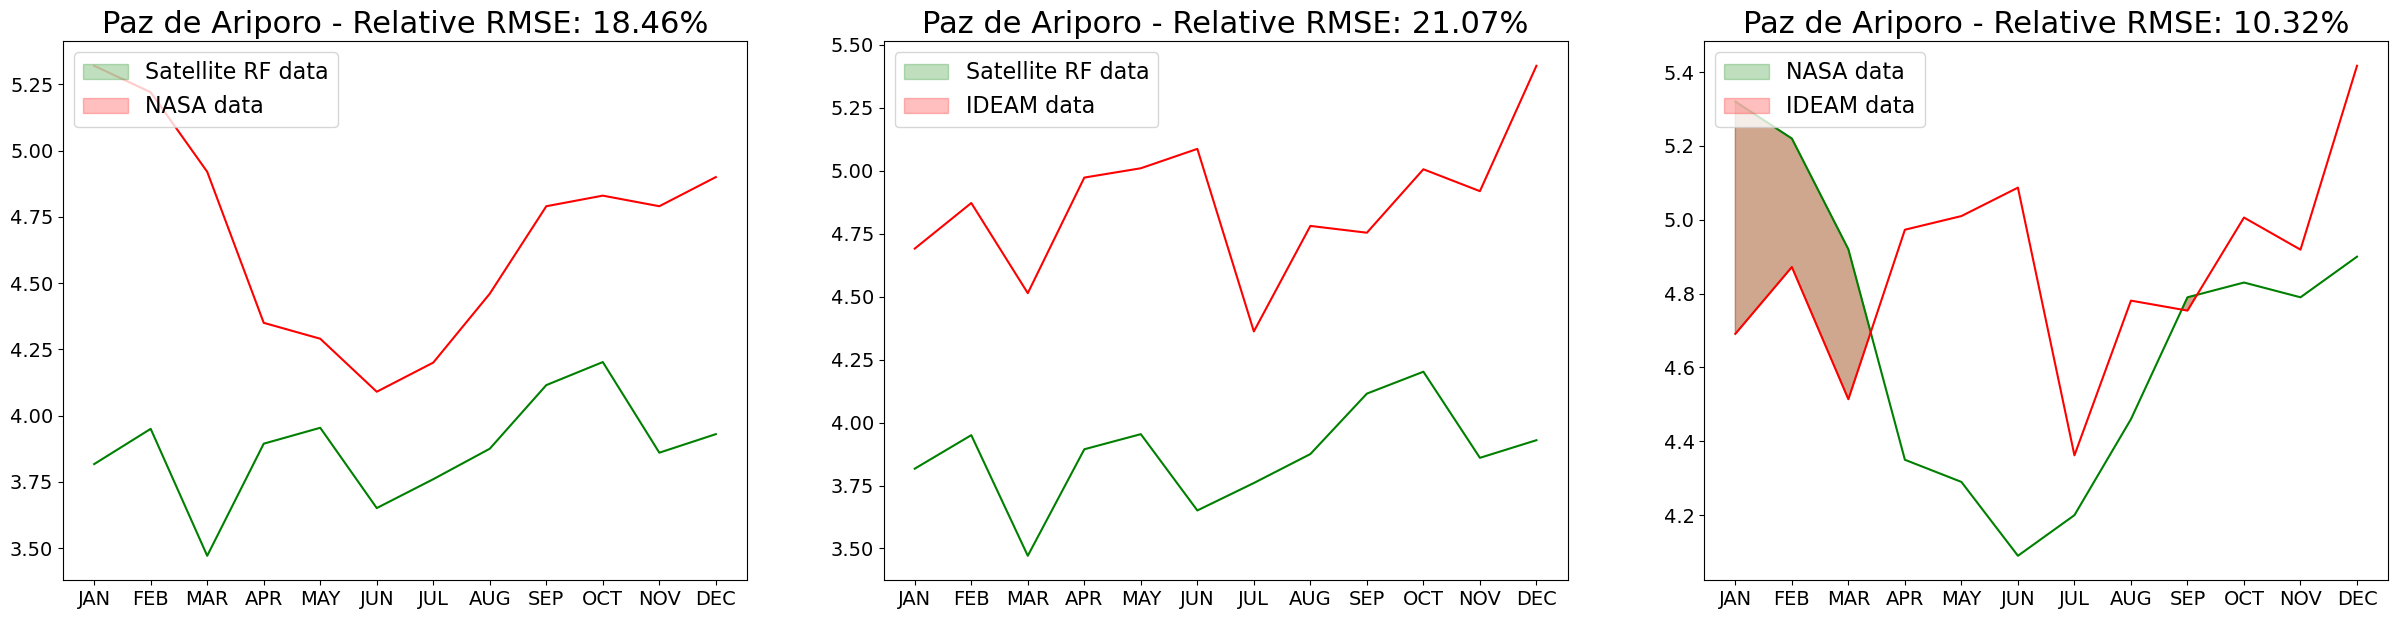

In [28]:
fig = plt.figure(figsize=(30, 7))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.4'], color="green")
ax.plot(mes, df['NASA.4'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.4'], df['NASA.4'], where=(df['RF.4'] > df['NASA.4']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.4'], df['NASA.4'], where=(df['RF.4'] > df['NASA.4']), 
    interpolate=True, color="red", alpha=0.25,
    label="NASA data"
)
# plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['NASA.4']), 4)), fontsize=18)
plt.title("Paz de Ariporo - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.4'], df['NASA.4'])) / df['IDEAM.4'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.4'], color="green")
ax.plot(mes, df['IDEAM.4'], color="red")

ax.fill_between(
    mes, df['RF.4'], df['IDEAM.4'], where=(df['RF.4'] > df['IDEAM.4']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)
ax.fill_between(
    mes, df['RF.4'], df['IDEAM.4'], where=(df['RF.4'] > df['IDEAM.4']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['RF.4'], df['IDEAM.4']), 4)), fontsize=18)
plt.title("Paz de Ariporo - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.4'], df['IDEAM.4'])) / df['IDEAM.4'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['NASA.4'], color="green")
ax.plot(mes, df['IDEAM.4'], color="red")

ax.fill_between(
    mes, df['NASA.4'], df['IDEAM.4'], where=(df['NASA.4'] > df['IDEAM.4']), 
    interpolate=True, color="green", alpha=0.25, 
    label="NASA data"
)
ax.fill_between(
    mes, df['NASA.4'], df['IDEAM.4'], where=(df['NASA.4'] > df['IDEAM.4']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Paz de Ariporo (Región Orinoquía) - MSE: "+str(round(mean_squared_error(df['NASA.4'], df['IDEAM.4']), 4)), fontsize=18)
plt.title("Paz de Ariporo - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['NASA.4'], df['IDEAM.4'])) / df['IDEAM.4'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

plt.savefig('Paz de Ariporo.png', dpi=300, bbox_inches='tight')
plt.show()

#### Santa Isabel Valdivia. Valdivia (Antioquia - Región Pacífica)

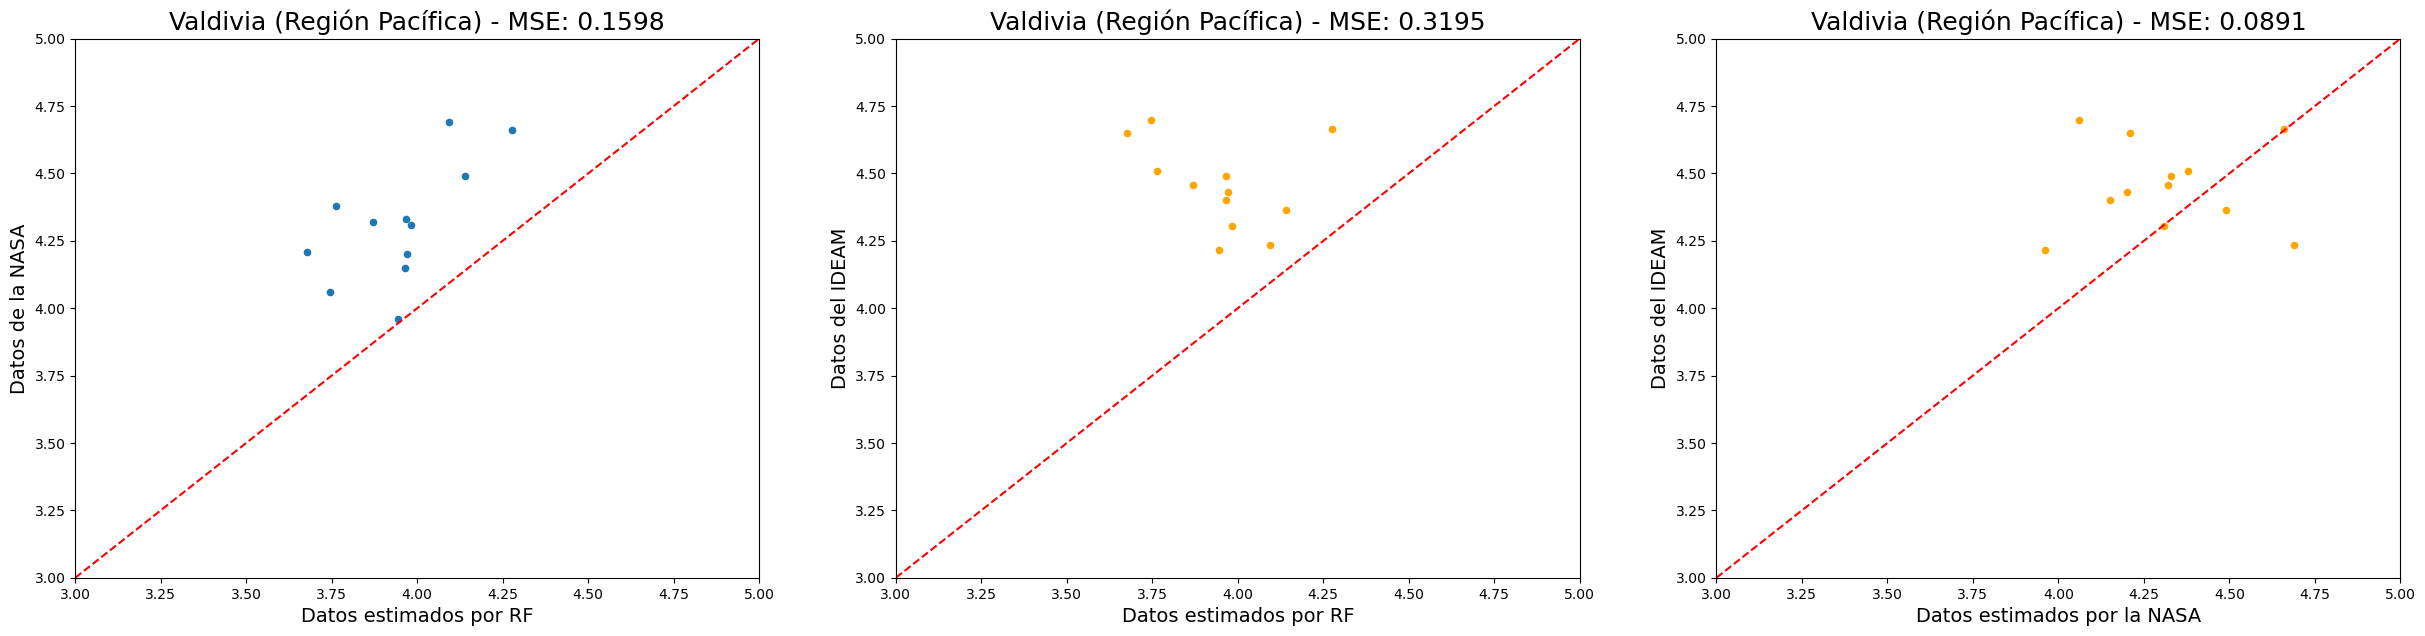

In [19]:
fig = plt.figure(figsize=(30, 7))

ax = fig.add_subplot(1,3,1)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.5', y='NASA.5', kind='scatter', ax=ax)
plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['RF.5'], df['NASA.5']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos de la NASA", fontsize=14)

ax = fig.add_subplot(1,3,2)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='RF.5', y='IDEAM.5', kind='scatter', ax=ax, color='orange')
plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['RF.5'], df['IDEAM.5']), 4)), fontsize=18)
plt.xlabel("Datos estimados por RF", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

ax = fig.add_subplot(1,3,3)
plt.axis([3, 5, 3, 5])
plt.plot([3, 5], [3, 5], "r--")
df.plot(x='NASA.5', y='IDEAM.5', kind='scatter', ax=ax, color='orange')
plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['NASA.5'], df['IDEAM.5']), 4)), fontsize=18)
plt.xlabel("Datos estimados por la NASA", fontsize=14)
plt.ylabel("Datos del IDEAM", fontsize=14)

plt.show()

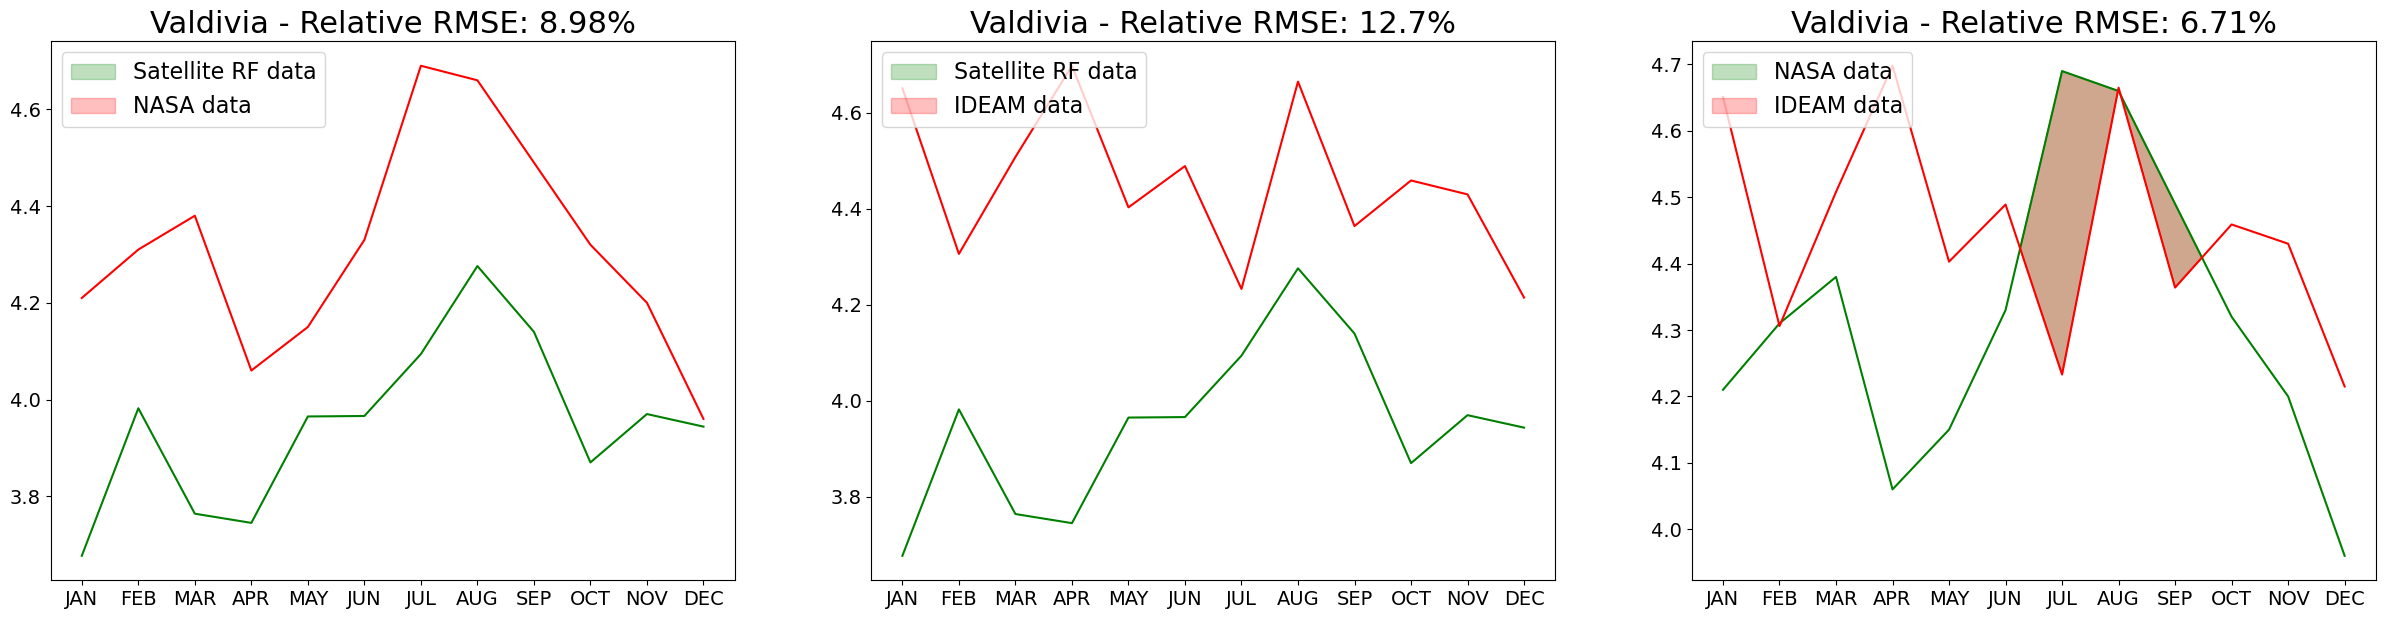

In [29]:
fig = plt.figure(figsize=(30, 7))

mes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax = fig.add_subplot(1,3,1)

# Plot lines
ax.plot(mes, df['RF.5'], color="green")
ax.plot(mes, df['NASA.5'], color="red")

# Fill area when income > expenses with green
ax.fill_between(
    mes, df['RF.5'], df['NASA.5'], where=(df['RF.5'] > df['NASA.5']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)

# Fill area when income <= expenses with red
ax.fill_between(
    mes, df['RF.5'], df['NASA.5'], where=(df['RF.5'] > df['NASA.5']), 
    interpolate=True, color="red", alpha=0.25,
    label="NASA data"
)
# plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['RF.5'], df['NASA.5']), 4)), fontsize=18)
plt.title("Valdivia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.5'], df['NASA.5'])) / df['IDEAM.5'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,2)
ax.plot(mes, df['RF.5'], color="green")
ax.plot(mes, df['IDEAM.5'], color="red")

ax.fill_between(
    mes, df['RF.5'], df['IDEAM.5'], where=(df['RF.5'] > df['IDEAM.5']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Satellite RF data"
)
ax.fill_between(
    mes, df['RF.5'], df['IDEAM.5'], where=(df['RF.5'] > df['IDEAM.5']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['RF.5'], df['IDEAM.5']), 4)), fontsize=18)
plt.title("Valdivia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['RF.5'], df['IDEAM.5'])) / df['IDEAM.5'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

ax = fig.add_subplot(1,3,3)
ax.plot(mes, df['NASA.5'], color="green")
ax.plot(mes, df['IDEAM.5'], color="red")

ax.fill_between(
    mes, df['NASA.5'], df['IDEAM.5'], where=(df['NASA.5'] > df['IDEAM.5']), 
    interpolate=True, color="green", alpha=0.25, 
    label="NASA data"
)
ax.fill_between(
    mes, df['NASA.5'], df['IDEAM.5'], where=(df['NASA.5'] > df['IDEAM.5']), 
    interpolate=True, color="red", alpha=0.25,
    label="IDEAM data"
)
# plt.title("Valdivia (Región Pacífica) - MSE: "+str(round(mean_squared_error(df['NASA.5'], df['IDEAM.5']), 4)), fontsize=18)
plt.title("Valdivia - Relative RMSE: "+str(round(np.sqrt(mean_squared_error(df['NASA.5'], df['IDEAM.5'])) / df['IDEAM.5'].mean() * 100, 2))+"%", fontsize=22)
# plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=16, loc='upper left');

plt.savefig('Valdivia.png', dpi=300, bbox_inches='tight')
plt.show()